In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [5]:
## reading the training data into the program
train = pd.read_csv('/Users/cerser5/House_Project/house-prices-advanced-regression-techniques/train.csv')
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
## Dropping the ID column from the data
train = train.drop('Id', axis = 1)
train.head(1)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [7]:
#showing types of columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
#Cleaning Data

In [10]:
# Find columns with missing values and their percent missing
train.isnull().sum()                                                     
miss_val = train.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=train.isnull().sum().sort_values(ascending=False), columns=['MissingCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissingCount.apply(lambda x : '{:.2f}'.format(float(x)/train.shape[0] * 100)) 
miss_val = miss_val[miss_val.MissingCount > 0]
miss_val

,MissingCount,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


In [11]:
# Dropping columns with significant amount of missing data
train = train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1)
train.shape

(1460, 75)

In [12]:
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace=True)

In [13]:
# Calculate the percentage of rows with missing values
percentage_missing = (train.isnull().sum(axis=1) / train.shape[1]) * 100

# Filter rows with missing values
rows_with_missing = train[percentage_missing > 10]

# Calculate the percentage of data that would be deleted
percentage_deleted = (len(rows_with_missing) / len(train)) * 100

print(f"Percentage of data to be deleted: {percentage_deleted:.2f}%")

Percentage of data to be deleted: 0.48%


In [14]:
train.dropna(inplace = True)
train.shape

(1338, 75)

In [15]:
miss_val = miss_val[~miss_val.index.isin(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])]
columns_with_missing_values = miss_val.index

# Iterates over each column with missing values
for column in columns_with_missing_values:
    # Get the unique values in the current column
    unique_values = train[column].unique()
    
    # Print the column name and its unique values
    print(f"Column: {column}")
    print("Unique Values:")
    print(unique_values)
    print()  # Added a blank line for readability

Column: LotFrontage
Unique Values:
[ 65.          80.          68.          60.          84.
  85.          75.          70.04995837  51.          50.
  70.          91.          66.         101.          57.
  44.         110.          98.          47.         108.
 112.          74.         115.          61.          48.
  52.         100.          24.          89.          63.
  76.          72.          81.          95.          69.
  21.          32.          78.         121.         122.
  40.          73.          77.          94.         105.
  34.          90.          55.          88.          82.
  71.         120.         107.          92.         134.
  86.          62.         141.          97.          54.
  64.          41.          79.         174.          99.
  83.          43.         103.          93.          30.
 129.         140.          35.          37.         118.
  87.         116.         150.         111.          49.
  96.          59.          36.      

In [16]:
# Picking specific columns im interested in seeing the correlation with the target variable
coi = ['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']
# Calculate the correlation matrix
correlation_matrix = train[coi].corr()

# Display the correlation matrix
print(correlation_matrix)

             1stFlrSF  2ndFlrSF  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1stFlrSF     1.000000 -0.220279    0.450366    0.094065   0.318097   
2ndFlrSF    -0.220279  1.000000   -0.151876   -0.109254  -0.016117   
BsmtFinSF1   0.450366 -0.151876    1.000000   -0.064855  -0.552809   
BsmtFinSF2   0.094065 -0.109254   -0.064855    1.000000  -0.233449   
BsmtUnfSF    0.318097 -0.016117   -0.552809   -0.233449   1.000000   
TotalBsmtSF  0.893110 -0.234070    0.505000    0.083184   0.363767   
GarageArea   0.500071  0.124564    0.284095   -0.053411   0.195401   
WoodDeckSF   0.233200  0.081291    0.187178    0.061206  -0.020711   
OpenPorchSF  0.226615  0.202791    0.107561    0.004211   0.122171   
SalePrice    0.604714  0.311354    0.359677   -0.031226   0.191689   

             TotalBsmtSF  GarageArea  WoodDeckSF  OpenPorchSF  SalePrice  
1stFlrSF        0.893110    0.500071    0.233200     0.226615   0.604714  
2ndFlrSF       -0.234070    0.124564    0.081291     0.202791   0.311354  
Bsmt

In [17]:
corr = train.corr()
corr["SalePrice"].sort_values(ascending=False).head(10)

/var/folders/8z/scpggshn6xnf6ktckbg7l7mm0000gn/T/ipykernel_32352/994387007.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


SalePrice       1.000000
OverallQual     0.783546
GrLivArea       0.711706
GarageCars      0.640154
GarageArea      0.607535
1stFlrSF        0.604714
TotalBsmtSF     0.602042
FullBath        0.569313
TotRmsAbvGrd    0.551821
YearBuilt       0.504297
Name: SalePrice, dtype: float64

/var/folders/8z/scpggshn6xnf6ktckbg7l7mm0000gn/T/ipykernel_32352/2974060189.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


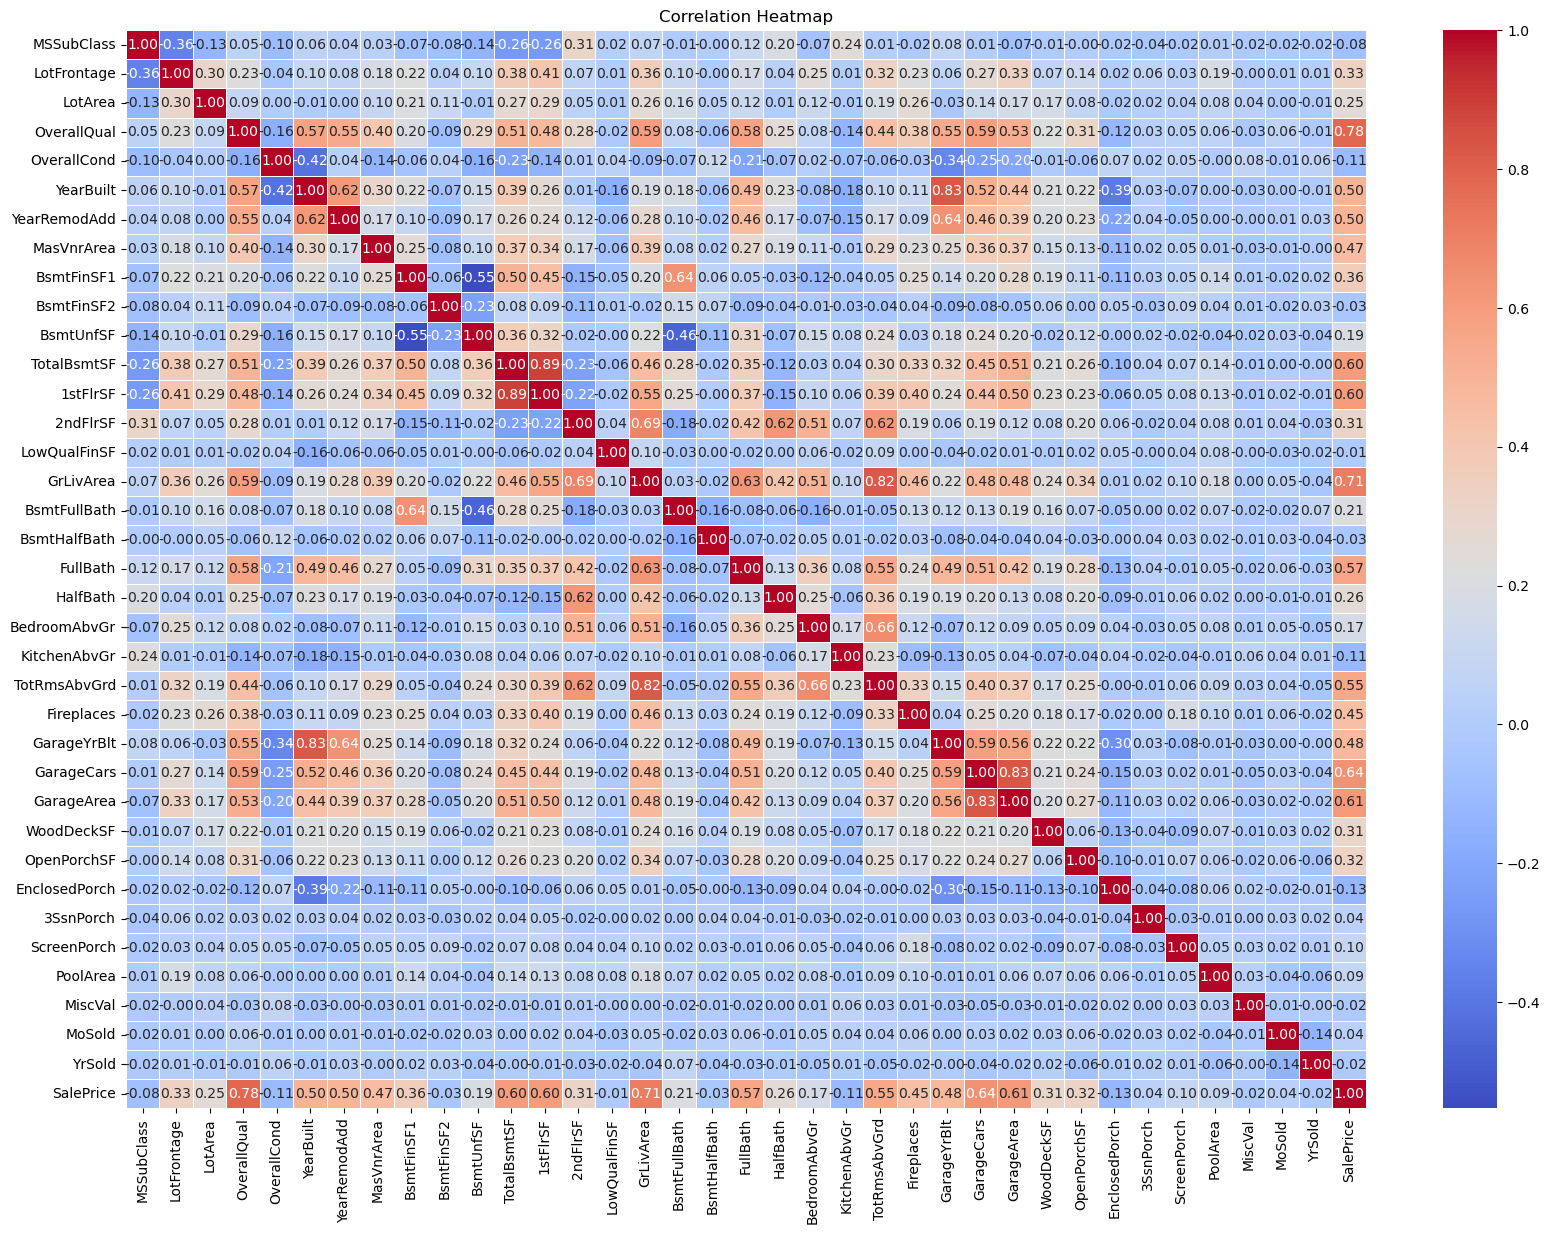

In [18]:
corr_matrix = train.corr()

plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# Identify categorical and numerical columns
categorical_columns = train.select_dtypes(include=['object']).columns
numerical_columns = train.select_dtypes(include=['number']).columns

# Handle categorical data
for column in categorical_columns:
    if train[column].isnull().any():
        train[column].fillna('Missing', inplace=True)

# Handle numerical data
for column in numerical_columns:
    if train[column].isnull().any():
        mean_value = train[column].mean()
        train[column].fillna(mean_value, inplace=True)

In [20]:
# Getting only data with numbers
train_num = train.select_dtypes(include = ['int64', 'float64'])
train_num.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [21]:
print(train_num['SalePrice'].describe())

count      1338.000000
mean     186761.782511
std       78913.847668
min       35311.000000
25%      135000.000000
50%      168500.000000
75%      220000.000000
max      755000.000000
Name: SalePrice, dtype: float64


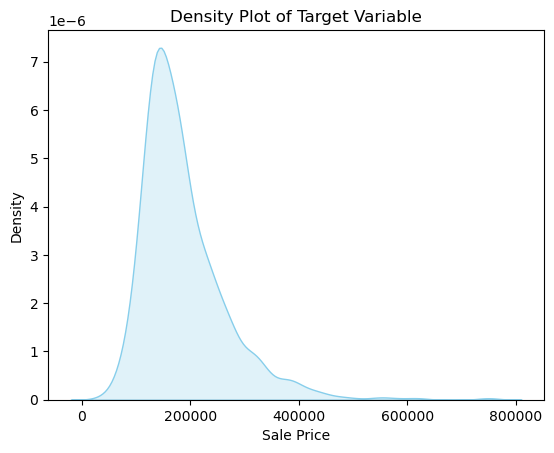

In [22]:
# Density Plot to see the spread of the Sale Price
sns.kdeplot(train_num['SalePrice'], fill=True, color='skyblue')
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.title('Density Plot of Target Variable')
plt.show()

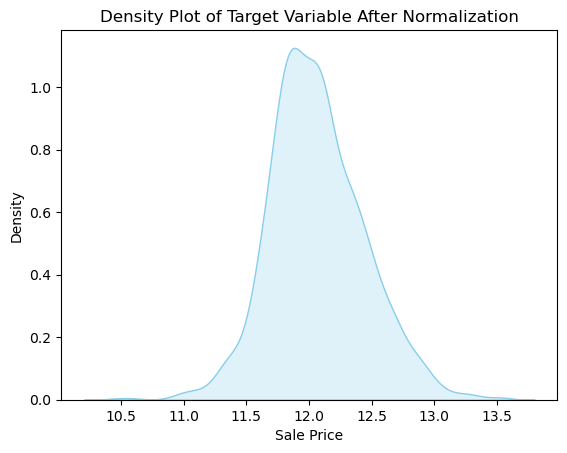

In [23]:
train['SalePrice'] = np.log1p(train['SalePrice'])

# Density Plot to see the spread of the Sale Price after normalization
sns.kdeplot(train['SalePrice'], fill=True, color='skyblue')
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.title('Density Plot of Target Variable After Normalization')
plt.show()

In [24]:
from scipy.stats import skew

#Top skewed columns
numeric_features = train.dtypes[train.dtypes != 'object'].index
skewed_features = train[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[abs(skewed_features) > 0.5]
print(high_skew)

MiscVal          24.604954
PoolArea         14.171921
LotArea          11.924736
LowQualFinSF     10.554965
3SsnPorch        10.085230
KitchenAbvGr      5.936896
BsmtFinSF2        4.141869
ScreenPorch       3.912455
BsmtHalfBath      3.843594
EnclosedPorch     3.201692
MasVnrArea        2.579788
LotFrontage       2.476736
OpenPorchSF       2.248428
TotalBsmtSF       2.211546
BsmtFinSF1        1.691498
WoodDeckSF        1.480078
GrLivArea         1.428703
1stFlrSF          1.395864
MSSubClass        1.390340
BsmtUnfSF         0.934314
OverallCond       0.896535
GarageArea        0.806173
2ndFlrSF          0.768284
TotRmsAbvGrd      0.672609
Fireplaces        0.570198
HalfBath          0.553392
YearRemodAdd     -0.562713
GarageYrBlt      -0.668706
YearBuilt        -0.677206
dtype: float64


In [25]:
#Transforming skewed columns
for feature in high_skew.index:
    train[feature] = np.log1p(train[feature])

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

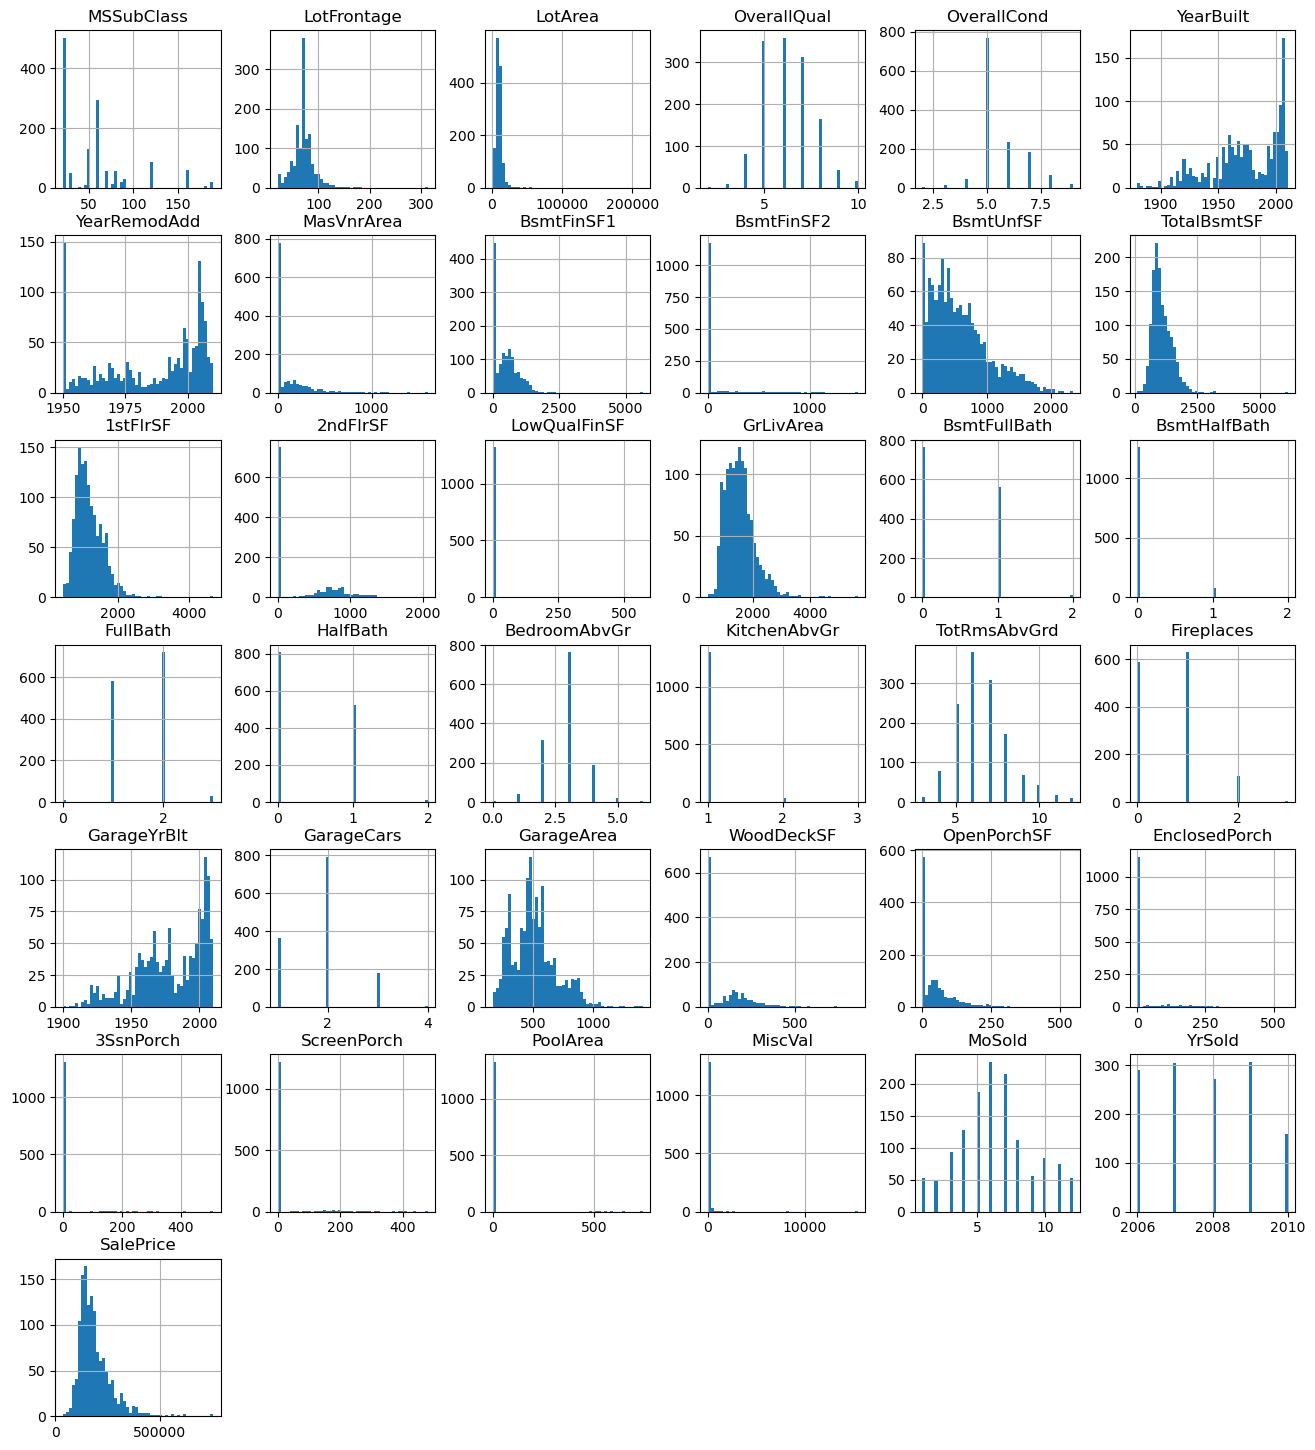

In [26]:
## plotting the numerical data
train_num.hist(figsize = (16,18), bins = 50, xlabelsize = 10, ylabelsize = 10)

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Create a label encoder object
label_encoder = LabelEncoder()

# Encode the entire dataset
encoded_df = train.copy()  # Assuming train_df is your DataFrame
for column in categorical_columns:
    encoded_df[column] = label_encoder.fit_transform(encoded_df[column])

# Split the encoded dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop(columns=['SalePrice']), 
                                                    encoded_df['SalePrice'], 
                                                    test_size=0.2, 
                                                    random_state=42)

print("Number of examples in training set:", len(X_train))
print("Number of examples in testing set:", len(X_test))

Number of examples in training set: 1070
Number of examples in testing set: 268


In [28]:
#from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y) 
#X = train.drop(columns=['SalePrice'])  
#y = train['SalePrice']

# Split the dataset into training and testing sets (by default, 75% training and 25% testing)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Optionally, you can convert them back to DataFrames if needed
#train_df = pd.concat([X_train, y_train], axis=1)
#test_df = pd.concat([X_test, y_test], axis=1)

#print("Number of examples in training set:", len(X_train))
#print("Number of examples in testing set:", len(X_test))

In [29]:
# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier
#rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
#rf_classifier.fit(X_train, y_train)

# Get feature importances
#feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
#indices = np.argsort(feature_importances)[::-1]

# Print feature ranking
#print("Feature ranking:")
#for i, idx in enumerate(indices):
    #print(f"{i + 1}. Feature {idx}: {feature_importances[idx]}")

# Plot feature importances
#import matplotlib.pyplot as plt

#plt.figure()
#plt.title("Feature Importances")
#plt.bar(range(X_train.shape[1]), feature_importances[indices],
       #color="r", align="center")
#plt.xticks(range(X_train.shape[1]), indices)
#plt.xlim([-1, X_train.shape[1]])
#plt.show()


Feature ranking:
1. Feature 15: 0.5289819865759806
2. Feature 44: 0.14000453421547046
3. Feature 36: 0.03804989075731486
4. Feature 58: 0.03384649906082849
5. Feature 41: 0.031789230742846133
6. Feature 17: 0.025246335154818018
7. Feature 59: 0.02014897442930098
8. Feature 32: 0.015389455773518617
9. Feature 18: 0.011799731967354494
10. Feature 55: 0.011672245942138462
11. Feature 3: 0.011594293031803144
12. Feature 42: 0.008457304474315587
13. Feature 1: 0.008290782604143166
14. Feature 2: 0.007362644880622291
15. Feature 28: 0.006981011803570429
16. Feature 10: 0.006552948920410452
17. Feature 16: 0.006275013443332549
18. Feature 35: 0.005313154008305091
19. Feature 54: 0.004903725006063264
20. Feature 56: 0.004752133259188413
21. Feature 24: 0.004328914779706028
22. Feature 64: 0.004296204344418161
23. Feature 52: 0.004262408906447088
24. Feature 31: 0.0037997870892511076
25. Feature 63: 0.003640976611941765
26. Feature 70: 0.0033291485701140754
27. Feature 51: 0.0033243149572503646

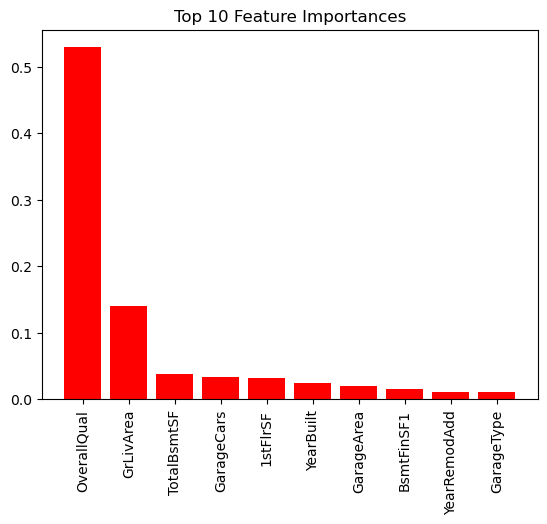

In [34]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a Random Forest regressor
rf_regressor = RandomForestRegressor()

# Fit the regressor to the training data
rf_regressor.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for i, idx in enumerate(indices):
    print(f"{i + 1}. Feature {idx}: {feature_importances[idx]}")

# Plot feature importances
top_indices = indices[:10]
top_feature_importances = feature_importances[top_indices]
top_feature_names = [feature_names[idx] for idx in top_indices]

plt.figure()
plt.title("Top 10 Feature Importances")
plt.bar(range(10), top_feature_importances, color="r", align="center")
plt.xticks(range(10), top_feature_names, rotation=90)
plt.show()

Feature ranking:
1. Feature 'OverallQual': 0.5218622925360062
2. Feature 'GrLivArea': 0.13920317916714098
3. Feature '1stFlrSF': 0.04011114168215997
4. Feature 'TotalBsmtSF': 0.03807380851407789
5. Feature 'GarageCars': 0.03251511376259051
6. Feature 'GarageArea': 0.024139036444945895
7. Feature 'YearBuilt': 0.022574117528834377
8. Feature 'BsmtFinSF1': 0.01814037976034566
9. Feature 'YearRemodAdd': 0.013984026791534534
10. Feature 'LotArea': 0.012135406598597185
11. Feature 'GarageType': 0.010003142244554002
12. Feature 'BsmtQual': 0.008799538474871263
13. Feature 'MSZoning': 0.00855749768436701
14. Feature 'LotFrontage': 0.007505717755602218
15. Feature '2ndFlrSF': 0.00727898866741019
16. Feature 'Neighborhood': 0.006250021352845853
17. Feature 'OverallCond': 0.006125157659909421
18. Feature 'BsmtUnfSF': 0.005221667802397656
19. Feature 'MasVnrArea': 0.004778407568120831
20. Feature 'GarageYrBlt': 0.004680853982046955
21. Feature 'Fireplaces': 0.004173530733336443
22. Feature 'WoodDe

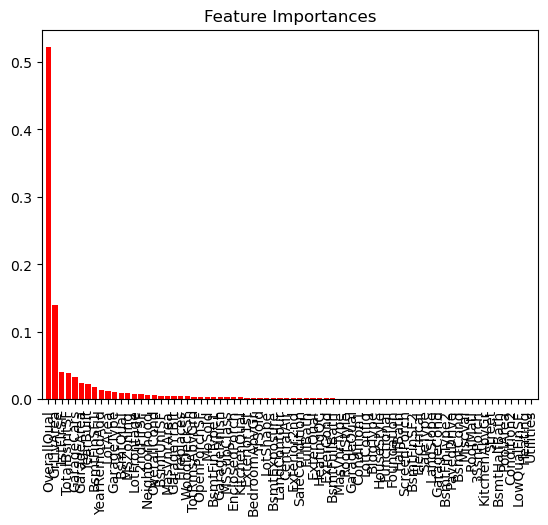

In [33]:
feature_names = X_train.columns

# Print feature ranking with names
print("Feature ranking:")
for i, idx in enumerate(indices):
    print(f"{i + 1}. Feature '{feature_names[idx]}': {feature_importances[idx]}")

# Plot feature importances with names
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[idx] for idx in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
# Random Forest Testing

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Select features based on top importance
selected_features = [15, 44, 58, 36, 41, 59, 17, 32, 18, 3]

# Prepare data
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

# Initialize and train the model
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train_selected, y_train)

# Make predictions
predictions = rf_regressor.predict(X_test_selected)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.10210576272955052


In [36]:
from sklearn.metrics import mean_squared_error

# Make predictions
predictions = rf_regressor.predict(X_test_selected)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.025503881683151656


In [37]:
# Reverse the normalization for both actual and predicted sale prices
actual_prices = np.expm1(y_test)
predicted_prices = np.expm1(predictions)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual_SalePrice': actual_prices, 'Predicted_SalePrice': predicted_prices})
print(comparison_df)

      Actual_SalePrice  Predicted_SalePrice
832           237000.0        223692.834650
965           178900.0        172902.336243
969           140000.0        126533.635237
1411          140000.0        152668.411665
284           179200.0        185121.785247
...                ...                  ...
119           163990.0        172300.210596
628           135000.0        190170.640804
585           369900.0        342645.909127
593           140000.0        144616.043006
918           238000.0        245265.968417

[268 rows x 2 columns]


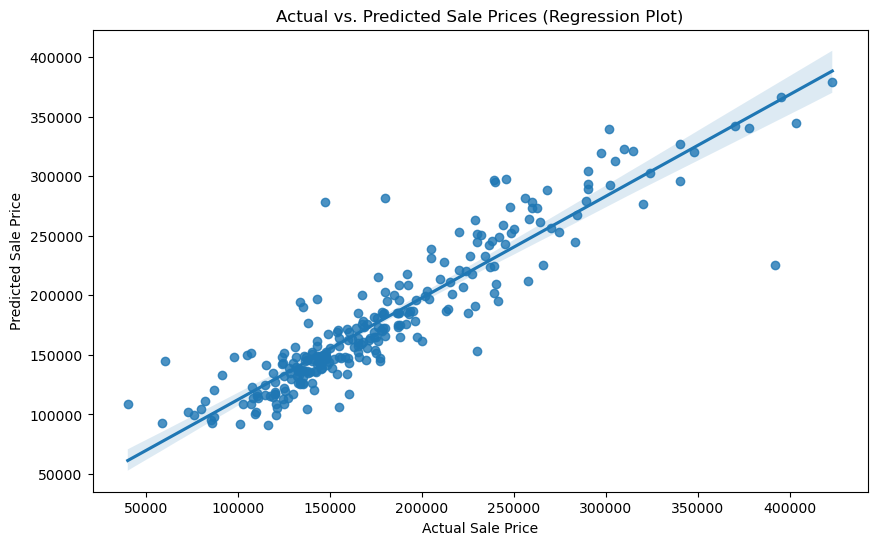

In [38]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual_SalePrice', y='Predicted_SalePrice', data=comparison_df)
plt.title('Actual vs. Predicted Sale Prices (Regression Plot)')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()

In [39]:
from sklearn.linear_model import LinearRegression

mlr_model = LinearRegression()

# Fit the model to the training data
mlr_model.fit(X_train, y_train)

# Get the coefficients (weights) assigned to each feature
coefficients = pd.DataFrame({'feature': X_train.columns, 'coefficient': mlr_model.coef_})

# Sort the coefficients by absolute value to get feature importance
mlr_feature_importance = coefficients.sort_values(by='coefficient', ascending=False)

print(mlr_feature_importance.head(10))

         feature  coefficient
17     YearBuilt     2.975916
18  YearRemodAdd     1.503437
44     GrLivArea     0.520724
4         Street     0.486813
16   OverallCond     0.292532
36   TotalBsmtSF     0.100176
58    GarageCars     0.070888
3        LotArea     0.067288
15   OverallQual     0.057756
9      LandSlope     0.057068


In [63]:
mlr_top_features = coefficients.nlargest(10, 'coefficient')  # Select top 5 features with highest coefficients

# Test the model using selected features
X_train_selected = X_train[mlr_top_features['feature']]
X_test_selected = X_test[mlr_top_features['feature']]

# Fit the model on selected features
model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)

# Make predictions
mlr_predictions = model_selected.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, mlr_predictions)
print(f"Mean Squared Error: {mse:.3f}")

Mean Squared Error: 36222508513.695


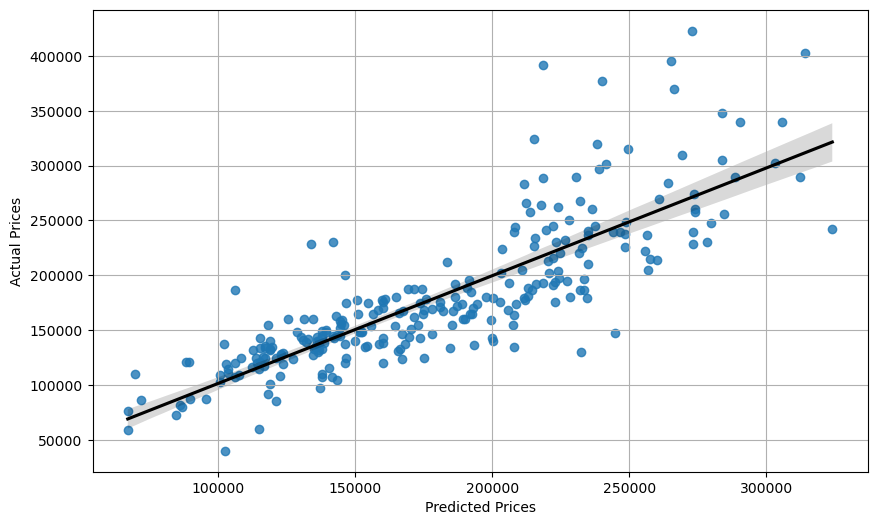

In [41]:
y_test = np.expm1(y_test)
mlr_predictions = np.expm1(mlr_predictions)

plt.figure(figsize=(10, 6))
sns.regplot(x=mlr_predictions, y=y_test, line_kws={'color': 'black'})
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.grid(True)

In [42]:
# reading the training data into the program
test = pd.read_csv('/Users/cerser5/House_Project/house-prices-advanced-regression-techniques/test.csv')
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [43]:
## Dropping the ID column from the data
test = test.drop('Id', axis = 1)
test.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


In [44]:
#Data Cleaning

In [45]:
# Find columns with missing values and their percent missing
test.isnull().sum()                                                     
miss_test_val = test.isnull().sum().sort_values(ascending=False)
miss_test_val = pd.DataFrame(data=test.isnull().sum().sort_values(ascending=False), columns=['MissingCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_test_val['Percent'] = miss_val.MissingCount.apply(lambda x : '{:.2f}'.format(float(x)/train.shape[0] * 100)) 
miss_test_val = miss_val[miss_val.MissingCount > 0]
miss_test_val

,MissingCount,Percent
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55
BsmtExposure,38,2.60
BsmtFinType2,38,2.60
BsmtCond,37,2.53
BsmtQual,37,2.53


In [46]:
# Dropping columns with significant amount of missing data
test = test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1)
test.shape

(1459, 74)

In [47]:
test['LotFrontage'].fillna(test['LotFrontage'].mean(), inplace=True)

In [48]:
# Calculate the percentage of rows with missing values
test_percentage_missing = (test.isnull().sum(axis=1) / test.shape[1]) * 100

# Filter rows with missing values
test_rows_with_missing = test[percentage_missing > 10]

# Calculate the percentage of data that would be deleted
test_percentage_deleted = (len(rows_with_missing) / len(test)) * 100

print(f"Percentage of data to be deleted: {percentage_deleted:.2f}%")

Percentage of data to be deleted: 0.48%


/var/folders/8z/scpggshn6xnf6ktckbg7l7mm0000gn/T/ipykernel_32352/2212324767.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_rows_with_missing = test[percentage_missing > 10]


In [49]:
test.dropna(inplace = True)
test.shape

(1319, 74)

In [50]:
#Top skewed columns
test_numeric_features = test.dtypes[test.dtypes != 'object'].index
test_skewed_features = test[test_numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
test_high_skew = test_skewed_features[abs(test_skewed_features) > 0.5]
print(high_skew)

MiscVal          24.604954
PoolArea         14.171921
LotArea          11.924736
LowQualFinSF     10.554965
3SsnPorch        10.085230
KitchenAbvGr      5.936896
BsmtFinSF2        4.141869
ScreenPorch       3.912455
BsmtHalfBath      3.843594
EnclosedPorch     3.201692
MasVnrArea        2.579788
LotFrontage       2.476736
OpenPorchSF       2.248428
TotalBsmtSF       2.211546
BsmtFinSF1        1.691498
WoodDeckSF        1.480078
GrLivArea         1.428703
1stFlrSF          1.395864
MSSubClass        1.390340
BsmtUnfSF         0.934314
OverallCond       0.896535
GarageArea        0.806173
2ndFlrSF          0.768284
TotRmsAbvGrd      0.672609
Fireplaces        0.570198
HalfBath          0.553392
YearRemodAdd     -0.562713
GarageYrBlt      -0.668706
YearBuilt        -0.677206
dtype: float64


In [51]:
# Identify categorical and numerical columns
test_categorical_columns = test.select_dtypes(include=['object']).columns
test_numerical_columns = test.select_dtypes(include=['number']).columns

# Handle categorical data
for column in test_categorical_columns:
    if test[column].isnull().any():
        test[column].fillna('Missing', inplace=True)

# Handle numerical data
for column in test_numerical_columns:
    if test[column].isnull().any():
        tes_mean_value = test[column].mean()
        test[column].fillna(test_mean_value, inplace=True)

In [52]:
# Getting only data with numbers
test_num = test.select_dtypes(include = ['int64', 'float64'])
test_num.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [53]:
#Transforming skewed columns
for feature in test_high_skew.index:
    test[feature] = np.log1p(test[feature])

In [58]:
# Encode the entire dataset
test_encoded_df = test.copy()  # Assuming train_df is your DataFrame
for column in categorical_columns:
    test_encoded_df[column] = label_encoder.fit_transform(test_encoded_df[column])

In [59]:
test_selected = test_encoded_df[top_features['feature']]

test_mlr_predictions = model_selected.predict(test_selected)

test_mlr_predictions = np.expm1(test_mlr_predictions)


/var/folders/8z/scpggshn6xnf6ktckbg7l7mm0000gn/T/ipykernel_32352/2184848589.py:5: RuntimeWarning: overflow encountered in expm1
  test_mlr_predictions = np.expm1(test_mlr_predictions)


In [61]:
test_mlr_predictions = pd.DataFrame(test_mlr_predictions)

decimal_places = 2

def format_number(x):
    return f'{x:.{decimal_places}f}'

# Apply the formatting function to all elements in the DataFrame
test_mlr_predictions = test_mlr_predictions.applymap(format_number)

print(test_mlr_predictions)

        0
0     inf
1     inf
2     inf
3     inf
4     inf
...   ...
1314  inf
1315  inf
1316  inf
1317  inf
1318  inf

[1319 rows x 1 columns]
